In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [3]:
def drawImage(img,title = "Image"):
    plt.style.use('seaborn')
    plt.imshow(img,cmap = 'gray')
    plt.axis('off')
    plt.title(title + str(img.shape))
    plt.show()

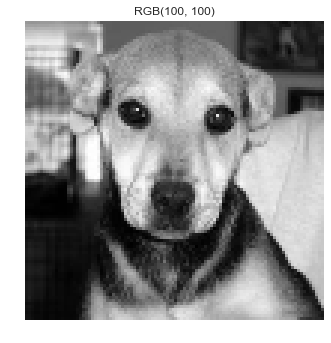

In [6]:
img = cv2.imread("Machine Learning/Convolution_Neural_Networks/dogs/dog.4.jpg")
img = cv2.resize(img,(100,100))
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
drawImage(img,title = "RGB")

In [14]:
def convolution(img,img_filter):
    W = img.shape[0] # Image width
    H = img.shape[1] # Image Height
    
    F = img_filter.shape[0] # Filter size
    
    new_img = np.zeros((W-F+1,H-F+1)) # Activation Map
    
    for row in range(W-F+1):
        for col in range(W-F+1):
            for i in range(F):
                for j in range(F):
                    new_img[row][col] += img[row+i][col+j]*img_filter[i][j]
                
                if new_img[row][col]>255:
                    new_img[row][col] = 255
                elif new_img[row][col]<0:
                    new_img[row][col] = 0
    return new_img

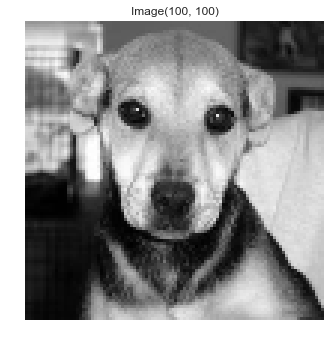

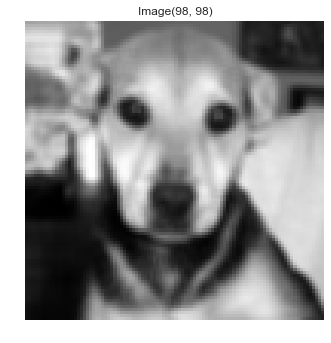

In [17]:
blur_filter = np.ones((3,3))/9.0
output1 = convolution(img=img,img_filter=blur_filter)
drawImage(img)
drawImage(output1)

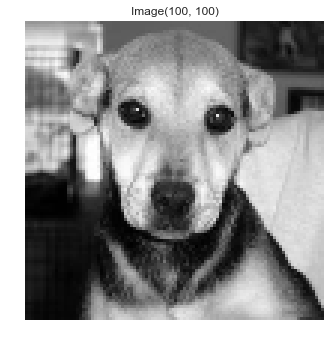

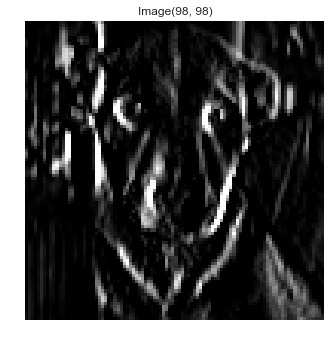

In [19]:
edge_filter = np.array([[1,0,-1],
                       [1,0,-1],
                       [1,0,-1]])
output2 = convolution(img,edge_filter)
drawImage(img)
drawImage(output2)

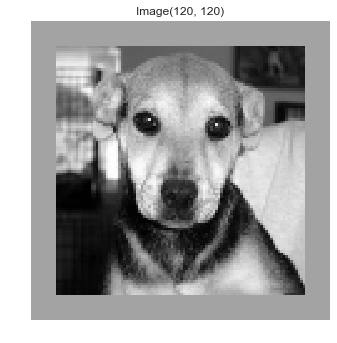

In [24]:
pad_img = np.pad(img,((10,10),(10,10)),mode='constant',constant_values=160)
drawImage(pad_img)

In [35]:
# Pooling


def pooling(X,mode = 'max'):
    F = 2
    H,W = X.shape
    stride = 2
    H0 = int((H-F)/stride)+1
    W0 = int((H-F)/stride)+1
    print(H0,W0)
    output = np.zeros((H0,W0))
    print(output.shape)
    for row in range(H0):
        for col in range(W0):
            r_start = row*stride
            r_end = r_start+F
            c_start = col*stride
            c_end = c_start+F
            
            X_sliced = X[r_start:r_end,c_start:c_end]
            
            if(mode == 'max'):
                output[row][col] = np.max(X_sliced)
            elif(mode == 'average'):
                output[row][col] = np.mean(X_sliced)
            else:
                RuntimeError
    return output

In [36]:
X = np.array([[1,0,2,3],
              [4,6,6,8],
              [3,1,1,0],
              [1,2,2,4]])
pooling(X)

2 2
(2, 2)


array([[6., 8.],
       [3., 4.]])